## World Happiness Report 2019

In [1]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Tamirhakimi/Dataproject2021T/main/2019.csv"
happy_df = pd.read_csv(url)
happy_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


#### הדאטה מדרגת 156 מדינות על פי ניקוד האושר הסופי שלהם. את ניקוד האושר אספו על פי 6 קטוגריות: חוסן כלכלי, שירותי הרווחה במדינה, תוחלת חיים בריאה, חופש בחירה, נדיבות ושקיפות השחיתות בממשל. 

### checking data:

In [2]:
happy_df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

#### we can see that there is no problem with the type's of values.

### checking missing values:

In [3]:
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

#### we can see there is no empty cells.

### checking exceptional values:

#####  כיוון שהיא ממספרת את המדינות בצורה כרונולוגית (מספר סידורי). אין בה שימוש overall rank הסרנו מהבדיקה את העמודה 

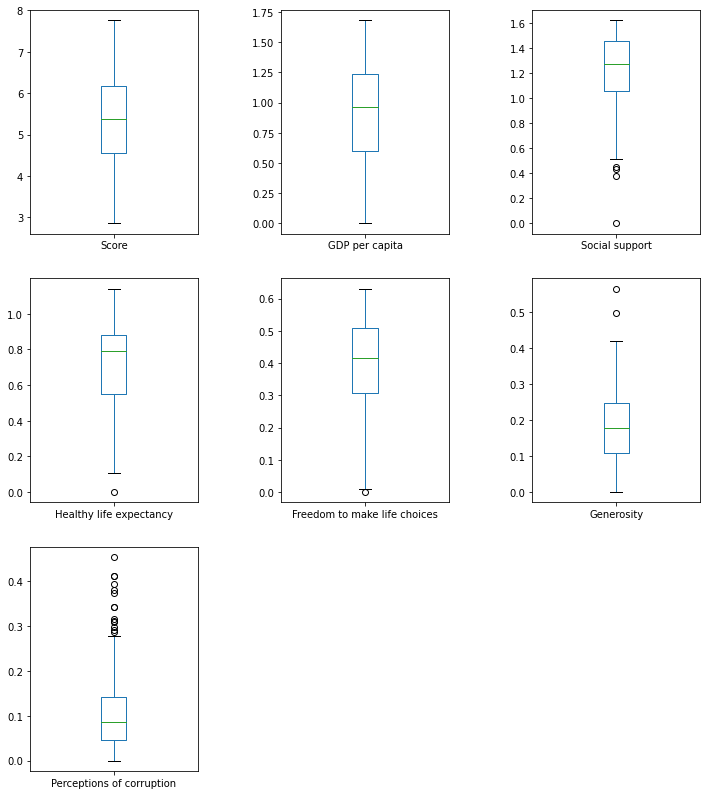

In [4]:
happy_df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].plot(subplots=True, layout=(3,3), kind='box', figsize=(12,14), patch_artist=False)
plt.subplots_adjust(wspace=0.5)

##### אנחנו רואים שהחציון בשירותי הרווחה במדינה והחוסן הכלכלי של המדינות הוא הגבוה ביותר. בואו נראה אם יש קשר ביניהם.

##### נבדוק את התפלגות הנתונים בשירותי רווחה, חוסן כלכלי ואת מדרג האושר.

array([[<AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'GDP per capita'}>],
       [<AxesSubplot:title={'center':'Social support'}>, <AxesSubplot:>]],
      dtype=object)

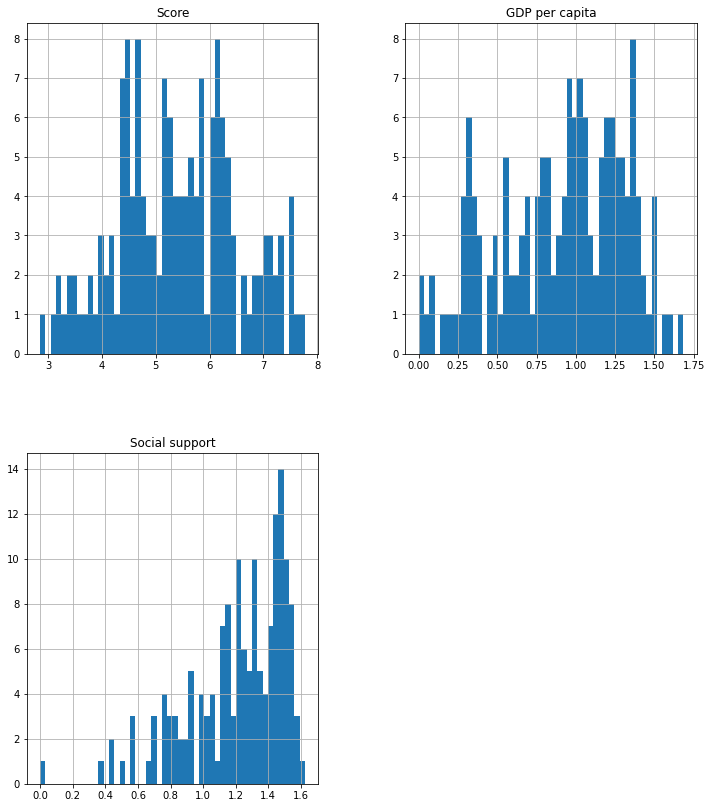

In [12]:
features=['Score','GDP per capita','Social support']
happy_df.hist(features,bins=50, figsize=(12,14))

##### ניתן לראות ששלושת הקטגוריות שלנו לא בהתפלגות נורמלית, לכן נבחר לבדוק קורצליה לפי ספירמן.

In [13]:
corr_df = happy_df[features].corr(method = "spearman")
corr_df

,Score,GDP per capita,Social support
Score,1.000000,0.814483,0.816181
GDP per capita,0.814483,1.000000,0.768539
Social support,0.816181,0.768539,1.000000


##### על ידי הקורלציה, ניתן לראות שיש התאמה גבוהה בין החוסן הכלכלי ושירותי רווחה למיקום המדינה בדירוג האושר.
##### בנוסף ניתן לראות שיש גם קשר חזק בין מדרג שירותי הרווחה לחוסן הכלכלי, ננסה לראות בצורה גרפית

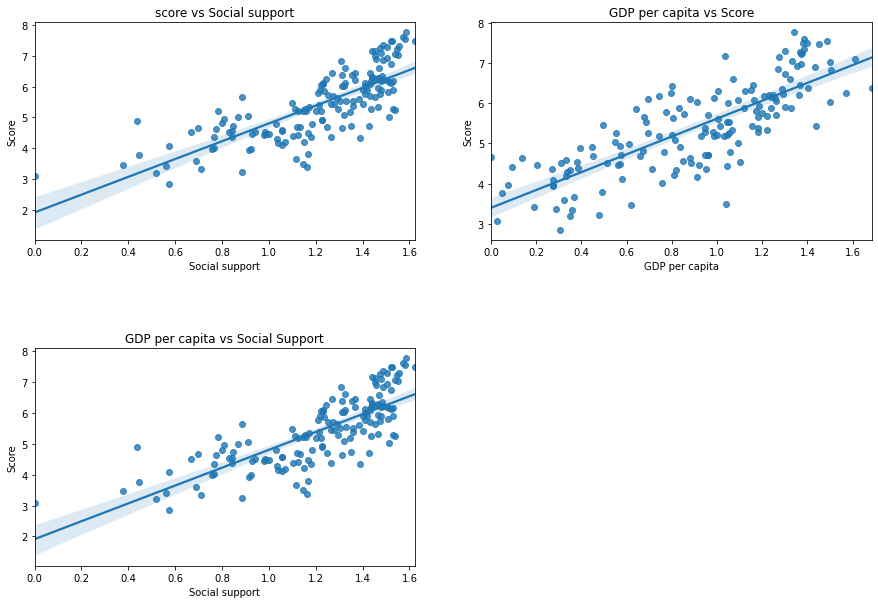

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('score vs Social support' )
scatterplot1 = sns.regplot(data=happy_df, x='Social support', y='Score')

plt.subplot(2,2,2)
plt.title("GDP per capita vs Score")
scatterplot2 = sns.regplot(data=happy_df, x='GDP per capita', y='Score')

plt.subplot(2,2,3)
plt.title("GDP per capita vs Social Support")
scatterplot2 = sns.regplot(data=happy_df, x='Social support', y='Score')
plt.subplots_adjust(hspace=0.5)

##### מסקנה:
##### ניתן לראות שככל שהחוסן הכלכלי במדינה עולה, וככל ששירותי הרווחה גבוהים במדינה, ישנה עליה בהתאמה בדירוג האושר במדינות.
##### כלומר, ניתן לומר שלחוסן כלכלי ושירותי רווחה במדינה יש קשר ישיר לאושר במדינה.
##### בנוסף, בגרף התחתון ניתן לראות שקיים קשר בין שירותי רווחה לחוסן הכלכלי. ושקיימת עלייה ישירה ואף התרכזות בערכים הגבוהים יותר בדאטה.

---

##### בבדיקת החריגות למעלה, שמנו לב שבערכי שקיפות הממשל יש חריגות גבוהות.

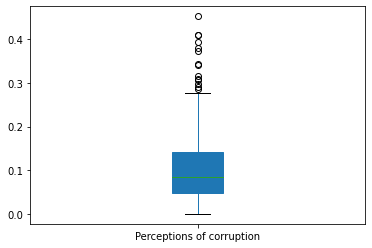

In [15]:
happy_df['Perceptions of corruption'].plot(kind='box', patch_artist=True);

##### ננסה לראות מי המדינות שנמצאות בחריגה

In [16]:
happy_df[happy_df['Perceptions of corruption']>0.2]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290


##### אנחנו יכולים לראות שאין הרבה מדינות בהן שקיפות הממשל גבוהה, אך אלו שכן מעל החציון,נמצאות במקומות הגבוהים מבחינת הדירוג באושר.
##### האם יש קשר?

<AxesSubplot:ylabel='Frequency'>

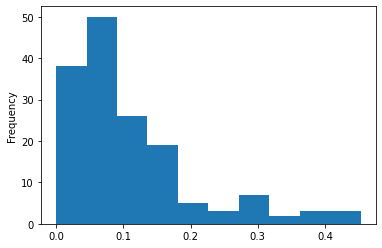

In [22]:
happy_df['Perceptions of corruption'].plot.hist()

##### ניתן לראות שריכוז רוב המדינות נמצא ברבע התחתון, כלומר ברוב המדינות מדד שקיפות הממשל לשחיתות הוא נמוך. 
##### ההתפלגות לא נורמלית, נבחר לעבוד עם ספירמן.

<AxesSubplot:>

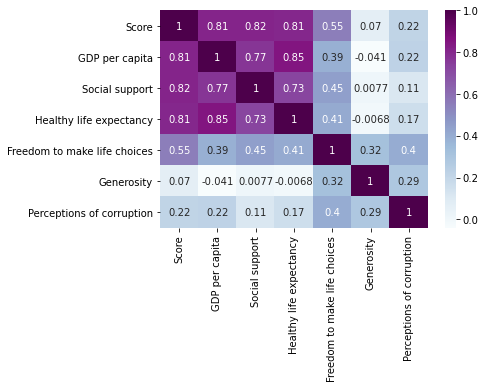

In [23]:
data_corr=happy_df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr(method = 'spearman')
sns.heatmap(data=data_corr, cmap='BuPu', annot=True)

##### ניתן לראות שלמרות שחשבנו שיש קשר בין שקיפות ממשלתית במדינה למידת האושר, כנראה שלא כך.
##### ההתאמות בין שקיפות הממשל, נדיבות וחופש הבחירה מאוד נמוכות ביחס לשאר הקטגוריות והשפעתן.
##### נבחר להוריד אותם ולהתרכז בקורלציות הגבוהות.

<AxesSubplot:>

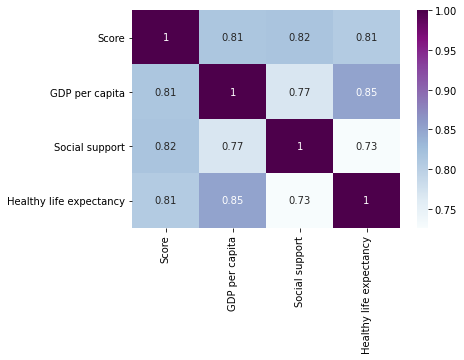

In [24]:
less_data_corr=happy_df[['Score','GDP per capita','Social support','Healthy life expectancy']].corr(method = 'spearman')
sns.heatmap(data=less_data_corr, cmap='BuPu', annot=True)

##### אז את החיבור בין השירותי רווחה לחוסן הכלכלי וניקוד האושר חיברנו במסקנה הראשונה.
##### אבל כאן אנחנו נחשפים למידע חדש, ולהתאמה חזקה בין תוחלת חיים בריאה לחוסן הכלכלי במדינה.

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Score'>

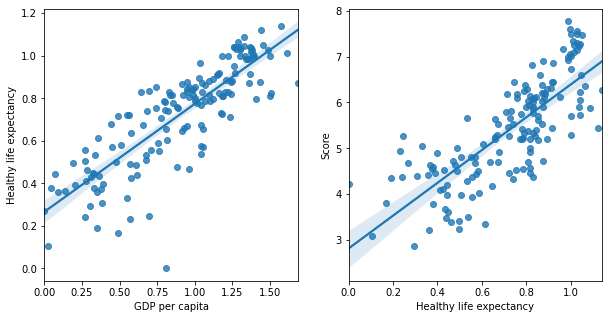

In [25]:
fig, axes=plt.subplots(1,2,figsize=(10,5))
sns.regplot(ax=axes[0],x='GDP per capita', y='Healthy life expectancy', data=happy_df)
sns.regplot(ax=axes[1],x='Healthy life expectancy', y='Score', data=happy_df)

##### מסקנה: ניתן לראות שככל החוסן הכלכלי במדינה עולה, כך גם תוחלת חיים בריאה (גרף שמאל).
#####  כאשר תוחלת חיים בריאה של האזרחים עולה, כך ניקוד רמת האושר במדינה עולה. (גרף ימין)

---

##### בתחילת ניתוח הדאטה ראינו שרוב המדינות המאושרות ביותר, נמצאות באזור הסקנדינבי באירופה.

In [26]:
happy_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


##### לכן עניין אותנו לבדוק האם יש משמעות למיקום הגאוגרפי.
##### הוספנו פונקציה שתחלק את הדאטה על פי יבשות

In [27]:
asia = ["Hong Kong","Northern Cyprus","Palestinian Territories","Afghanistan","Armenia","Azerbaijan","Bahrain","Bangladesh","Bhutan","Brunei","Cambodia","China","Cyprus","Georgia","India","Indonesia","Iran","Iraq","Israel","Japan","Jordan","Kazakhstan","Kuwait","Kyrgyzstan","Laos","Lebanon","Malaysia","Maldives","Mongolia","Myanmar" ,"Nepal","North Korea","Oman","Pakistan","Palestine","Philippines","Qatar","Russia","Saudi Arabia","Singapore","South Korea","Sri Lanka","Syria","Taiwan","Tajikistan","Thailand","Timor-Leste","Turkey","Turkmenistan","United Arab Emirates","Uzbekistan","Vietnam","Yemen"]
europe = ["Moldova","Montenegro","Bosnia and Herzegovina", "Belarus", "North Macedonia","Kosovo","Albania","Ukraine","Swaziland","Malta","Belgium","Ireland","United Kingdom",'Germany','Spain', 'France', 'Italy', 'Netherlands', 'Norway', 'Sweden','Czech Republic', 'Finland','Denmark', 'Czech Republic', 'Switzerland', 'UK', 'UK&I', 'Poland', 'Greece','Austria','Bulgaria', 'Hungary', 'Luxembourg', 'Romania' , 'Slovakia', 'Estonia', 'Slovenia','Portugal','Croatia', 'Lithuania', 'Latvia','Serbia', 'Estonia', 'ME', 'Iceland']
africa = ["Congo (Kinshasa)","Congo (Brazzaville)",'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon','Central African Republic','Chad','Comoros','Democratic Republic of the Congo','Republic of the Congo','Djibouti','Egypt','Equatorial Guinea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe']
northAmerica = ["Dominican Republic","Haiti","Jamaica","Honduras",'United States',"Canada","Nicaragua"]
Oceania = ['New Zealand' ,'Australia']
southAmerica = ["Peru","Paraguay","Bolivia","Trinidad & Tobago","Colombia","Venezuela","Canada","Costa Rica","Mexico", "Chile","Guatemala","Panama","Brazil","Uruguay","El Salvador","Ecuador","Argentina"]

def GetConti(counry):
    if counry in asia:
        return "Asia"
    elif counry in europe:
        return "Europe"
    elif counry in africa:
        return "Africa"
    elif counry in northAmerica:
        return "North America"
    elif counry in Oceania:
        return "Oceania"
    elif counry in southAmerica:
        return "South America"
happy_df['Continent']=happy_df['Country or region'].apply(lambda x: GetConti(x))
happy_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Africa


##### נציג בצורה ויזואלית את נתוני היבשות

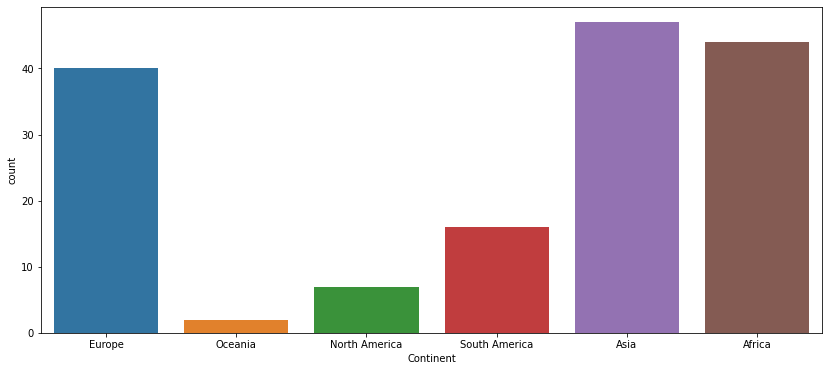

In [28]:
plt.figure(figsize=(14,6))
Count_Plot=sns.countplot(x="Continent", data=happy_df)

##### ניתן לראות שיבשת אוקיניה (אוסטרליה וניו זילנד) מכילה מעט מאוד דאטה, לכן לא נתרכז בה.
##### בנוסף, ניתן לראות שרוב הדאטה מחולקת בין אירופה, אסיה ואפריקה.
##### נסתכל על ממוצע האושר בכל יבשת

In [29]:
happy_df.pivot_table('Score','Continent',margins=True).sort_values('Score')

,Score
Continent,
Africa,4.371841
Asia,5.273872
All,5.407096
North America,5.863857
South America,6.135375
Europe,6.238150
Oceania,7.267500


##### מה אנחנו רואים?
##### ניתן לראות שאסיה ואפריקה הן היבשות הנמצאות מתחת לממוצע האושר הכולל, כלומר היבשות הכי פחות מאושרות.
##### לאורך כל הניתוח ראינו שיש משמעות חזקה לחוסן הכלכלי והרווחה ביחס לאושר.
##### בואו נראה מה קורה ביבשות בקטגוריות אלו

In [30]:
happy_df.pivot_table('GDP per capita','Continent',margins=True).sort_values('GDP per capita')

,GDP per capita
Continent,
Africa,0.491364
North America,0.900429
All,0.905147
Asia,0.984596
South America,0.994063
Europe,1.210600
Oceania,1.337500


##### ניתן לראות שלמרות שאסיה מתחת לממוצע בדירוג באושר, החוסן הכלכלי שלה מאוד גבוה ומעל הממוצע.

In [31]:
happy_df.pivot_table('Social support','Continent',margins=True).sort_values('Social support')

,Social support
Continent,
Africa,0.927318
Asia,1.203702
All,1.208814
North America,1.298571
South America,1.375375
Europe,1.424950
Oceania,1.552500


 ##### ניתן לראות ששירותי הרווחה באסיה נמצאים מתחת לממוצע, ומקום שני מהסוף. בהתאמה לדירוג האושר

##### נסתכל ויזואלית על הקשר בין העמודות רק באסיה

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

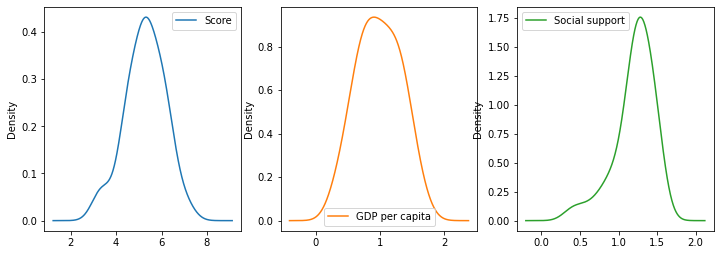

In [32]:
happy_asia=happy_df[happy_df['Continent'].str.contains('Asia')]
features=['Score','GDP per capita','Social support']
happy_asia[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3,3), figsize=(12,14))

##### התפלגות נורמלית (פעמון). נסתכל על פי פירסון.

<AxesSubplot:>

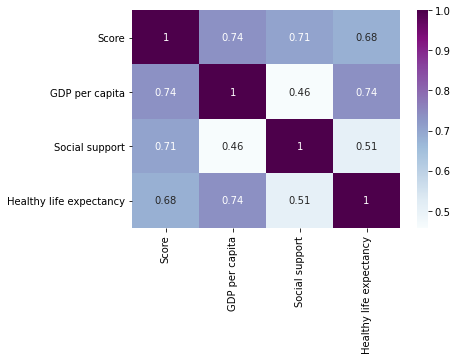

In [33]:

data_corr=happy_asia[['Score','GDP per capita','Social support','Healthy life expectancy']].corr(method = 'pearson')
sns.heatmap(data=data_corr, cmap='BuPu', annot=True)

##### מה רואים?
* התאמה בין שירותי רווחה למדרג האושר - כפי שראינו עד כה בניתוח
* התאמה בין מדרג האושר לחוסן הכלכלי - כפי שראינו עד כה בניתוח
* התאמה בין חוסן כלכלי לתוחלת חיים בריאה - כפי שראינו בניתוח
##### ההתאמה בין שירותי הרווחה והחוסן הכלכלי מאוד נמוכה באסיה, ביחס למה שראינו בדאטה הכוללת.

##### מסקנה: מה הגיע קודם?
ככל הנראה ע"פ הניתוח ניתן להסיק ששרותי הרווחה במדינה הם גורם משפיע ואף דומיננטי למדד האושר.
למרות שחשבנו שהחוסן הכלכלי הוא הגורם המשפיע על האושר, ניתן לראות שבאסיה למרות שהחוסן הכלכלי מאוד גבוה בממוצע, היבשת בממוצע אינה נמצאת בדירוג אושר גבוהה.
מהדאטה אנו לומדים שאם מידת האושר במדינה גבוהה, בהכרח גם החוסן הכלכלי גבוהה בהתאמה. אך לא להפך- כפי שאנו יכולים לראות עם יבשת אסיה לאו דווקא חוסן כלכלי גבוהה יוביל לדירוג אושר גבוהה.
מתקבלת מסקנה מרכזית:
דירוג שירותי רווחה גבוה יוביל למדרג אושר גבוה.
מדרג אושר גבוה יוביל לחוסן כלכלי גבוה
חוסן כלכלי גבוה, מוביל לתוחלת חיים בריאה.